# Рабочая тетрадь 3

#### Пример 1.2.1
Напишите функцию sum_range(start, end), которая суммирует все целые числа от значения «start» до величины «end» включительно.
Если пользователь задаст первое число большее чем второе, просто поменяйте их местами.


In [1]:
import pandas as pd


def sum_range(start, end):
    if start > end:
        end, start = start, end
    return sum(range(start, end + 1))


print(sum_range(2, 12))
print(sum_range(-4, 4))
print(sum_range(3, -1))

77
0
5


#### Пример 1.2.2
Напишите рекурсивную функцию вычисления факториала на языке Python.

In [2]:
def fact(num):
    if num == 0:
        return 1
    else:
        return num * fact(num - 1)


print(fact(5))

120


#### Пример 1.2.3
Напишите функции в Python, которая вычисляет Евклидово расстояние между двумя массивами NumPy.

In [3]:
import numpy as np


def euclidean_distance(v1, v2):
    return sum((x - y) ** 2 for x, y in zip(v1, v2)) ** 0.5


x = [0, 0, 0]
y = [3, 3, 3]
print(euclidean_distance(x, y))

5.196152422706632


#### Пример 1.2.4
Напишите 4 функции в Python, которые рассчитывают квадрат Евклидова расстояния, взвешенное евклидово расстояние, Хеммингово расстояние и расстояние Чебышева между двумя массивами NumPy.

In [4]:
def sqr_euclidean_distance(v1, v2):
    return sum((x - y) ** 2 for x, y in zip(v1, v2))


def weighted_euclidean_distance(v1, v2, w):
    return sum((x - y) ** 2 * s for x, y, s in zip(v1, v2, w)) ** 0.5


def manhattan_distance(v1, v2):
    return sum(abs(x - y) for x, y in zip(v1, v2))


def chebyshev_distance(v1, v2):
    return max(abs(x - y) for x, y in zip(v1, v2))


x = np.array([0, 0, 0])
y = np.array([3, 3, 3])
w = np.array([0, 0, 1])
print(sqr_euclidean_distance(x, y))
print(weighted_euclidean_distance(x, y, w))
print(manhattan_distance(x, y))
print(chebyshev_distance(x, y))

27
3.0
9
3


#### Пример 1.2.5
В Python есть встроенные функции для вычисления расстояний между векторами. Мы будем использовать NumPy для расчета расстояния для двух точек, поскольку ранее рассмотренные структуры данных могут быть переведены в Numpy массив с помошью специальных функциий. Например, для серий это будет выглядеть следующим образом: seriesName.to_numpy().

Для удобства визуализации и анализа результатов в дальнейших расчетах будм использовать 2 точки в 3-х мерном пространстве:

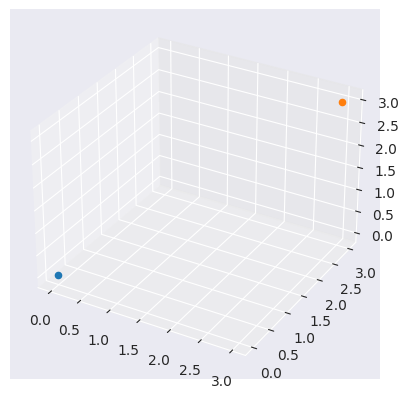

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
plt.show()

#### Пример 1.2.6
Рассчитать расстояния между двумя точками с использованием методов определения расстояний, представленных выше.

In [6]:
# euclidean
print(np.linalg.norm(x - y))
# square euclidean
print(np.linalg.norm(x - y) ** 2)
# chebyshev
print(np.linalg.norm(x - y, ord=np.inf))
# hemming
print(np.linalg.norm(x - y, ord=1))

5.196152422706632
27.0
3.0
9.0


#### Задача 1.3.1

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.

        array 1       array 2  euclidean  sqr euclidean  chebyshev  manhattan
0     [1, 2, 3]     [4, 5, 6]   5.196152           27.0        3.0        9.0
1     [1, 2, 3]  [17, 18, 19]  27.712813          768.0       16.0       48.0
2     [1, 2, 3]   [0, 10, 11]  11.357817          129.0        8.0       17.0
3     [4, 5, 6]  [17, 18, 19]  22.516660          507.0       13.0       39.0
4     [4, 5, 6]   [0, 10, 11]   8.124038           66.0        5.0       14.0
5  [17, 18, 19]   [0, 10, 11]  20.420578          417.0       17.0       33.0


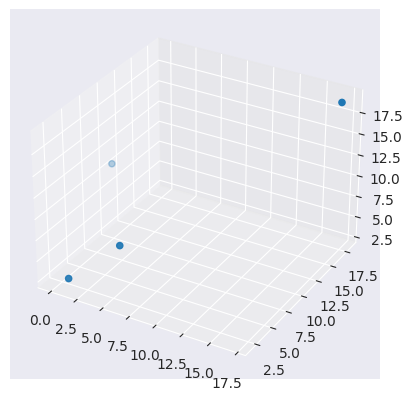

In [7]:
from itertools import combinations
import pandas as pd

d0 = np.array([1, 2, 3])
d1 = np.array([4, 5, 6])
d2 = np.array([17, 18, 19])
d3 = np.array([0, 10, 11])

distances = pd.DataFrame(columns=['array 1', 'array 2', 'euclidean', 'sqr euclidean', 'chebyshev', 'manhattan'])

for pair in list(combinations([d0, d1, d2, d3], 2)):
    distances.loc[len(distances)] = [pair[0], pair[1],
                                     np.linalg.norm(pair[0] - pair[1]),
                                     np.linalg.norm(pair[0] - pair[1]) ** 2,
                                     np.linalg.norm(pair[0] - pair[1], ord=np.inf),
                                     np.linalg.norm(pair[0] - pair[1], ord=1)
                                     ]

print(distances)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(d0, d1, d2, d3))
plt.show()

#### Задача 1.3.2

Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.

In [8]:
z = np.zeros((5, 5))
z += np.arange(5)
print(z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


#### Пример 2.2.1
В примере показано создание 2d-массива со значениями x и y. Список target содержит возможные выходные классы (часто называемые метками). Далее происходит обучене классификатора k-ближайших соседей по исходным данным. Далее производится прогноз принадлежности к классам для двух точек данных.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x, target)
print(model)
print('(-2, -2) is a class')
print(model.predict([[-2, -2]]))
print('(1, 3) is a class')
print(model.predict([[1, 3]]))

KNeighborsClassifier(n_neighbors=3)
(-2, -2) is a class
[0]
(1, 3) is a class
[1]


#### Пример 2.2.2
Далее приведем более наглядный пример. Будет построена граница решения для каждого класса. В качестве данных будем использовать уже знакомый нам и встроенный в библиотеку sklearn набор данных ирисов Фишера. Этот набор данных стал уже классическим, и часто используется в литературе для иллюстрации работы различных статистических алгоритмов. Датасет содержит наблюдения за 150 разными цветками ирисов, данные по каждому цветку расположены в строках. В стобцах записаны длина и ширина чашелистика, длина и ширина лепестка, вид ириса.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Пример 2.2.3
Покажем на графиках зависимости ширины лепестка от его длины, а также аналогичный график зависимость для длины и ширины чашелистика. Разные виды цветков отмечены разными цветами.

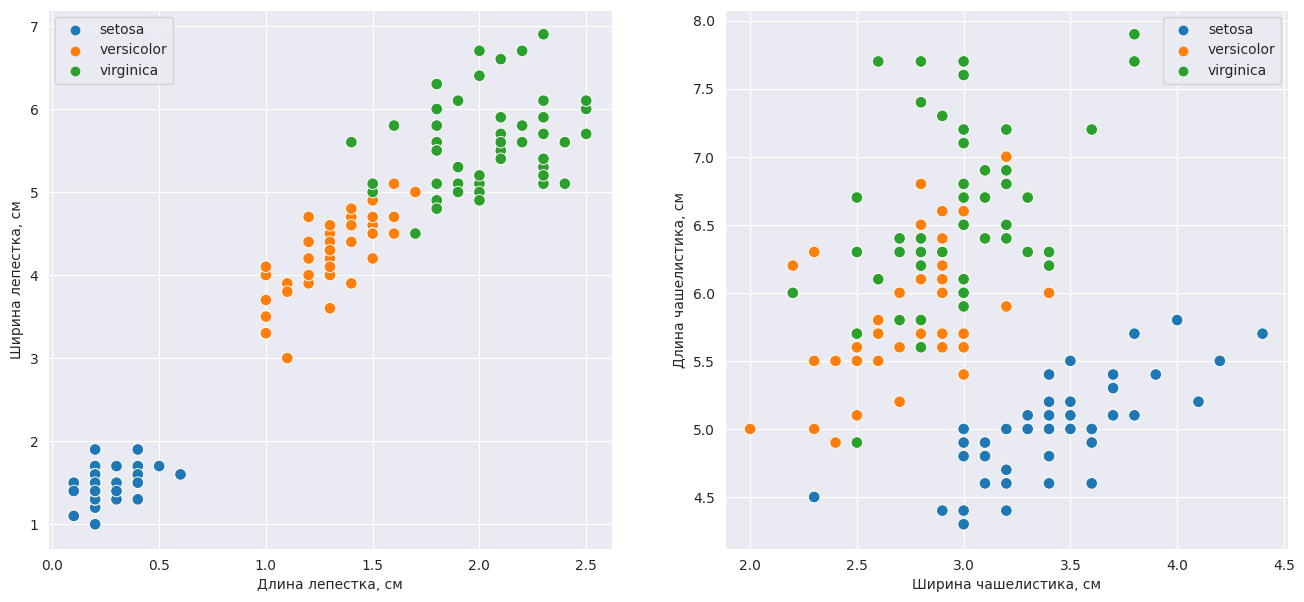

In [11]:
plt.figure(figsize=(16, 7))
# plt.grid()

plt.subplot(121)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend()
plt.grid(True)

plt.subplot(122)
sns.scatterplot(
    data=iris,
    x='sepal_width', y='sepal_length',
    hue='species',
    s=70
)
plt.ylabel('Длина чашелистика, см')
plt.xlabel('Ширина чашелистика, см')
plt.legend()
plt.grid(True)
# plt.show()

#### Пример 2.2.4
Из графиков видно, что в первом случае классы визуально хорошо отделимы друг от друга, хотя два классе имеют небольшое пересечение. Во втором случае разделить два класса между собой уже намного труднее.

Далее разделим датасет на обучающую и тестовую выборки в соотношении 80:20. Обучающая выборка (training sample) — выборка, по которой производится настройка (оптимизация параметров) модели зависимости. Тестовая (или контрольная) выборка (test sample) — выборка, по которой оценивается качество построенной модели.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.20)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [13]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
84,5.4,3.0,4.5,1.5
43,5.0,3.5,1.6,0.6
120,6.9,3.2,5.7,2.3
5,5.4,3.9,1.7,0.4
99,5.7,2.8,4.1,1.3


In [14]:
y_train.head()

84     versicolor
43         setosa
120     virginica
5          setosa
99     versicolor
Name: species, dtype: object

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = model.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

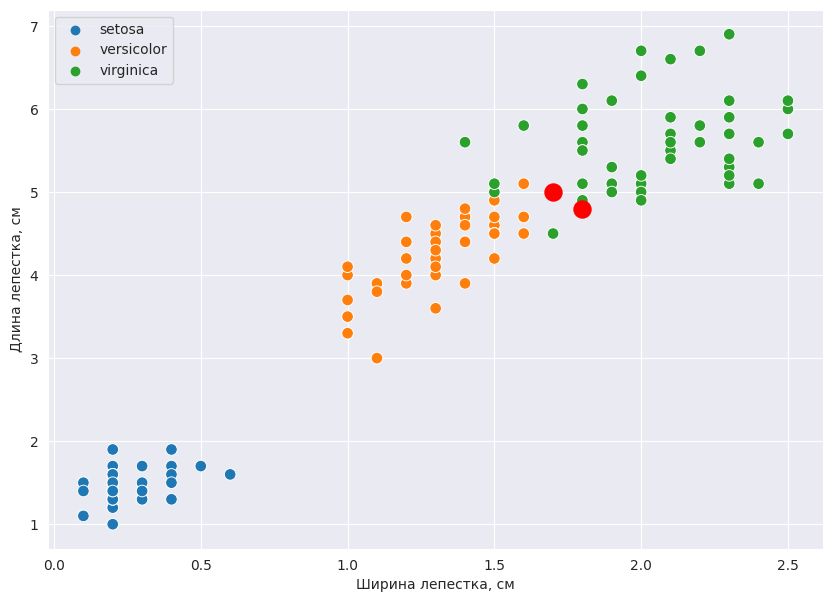

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.ylabel('Длина лепестка, см')
plt.xlabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid(True)

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [18]:
from sklearn.metrics import accuracy_score

print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

accuracy: 0.933


#### Задача 2.3.1
Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1.	Установите другое количество ближайших соседей (k = 1, 5, 10).
2.	Установите размер тестовой выборки 15% от всего датасета.
3.	Постройте графики и оцените качество моделей, проанализируйте результаты.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.15)

model1 = KNeighborsClassifier(n_neighbors=1)
model5 = KNeighborsClassifier(n_neighbors=5)
model10 = KNeighborsClassifier(n_neighbors=10)

In [20]:
model1.fit(X_train, y_train)
model5.fit(X_train, y_train)
model10.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred10 = model10.predict(X_test)

first accuracy: 0.957
second accuracy: 0.957
third accuracy: 0.957


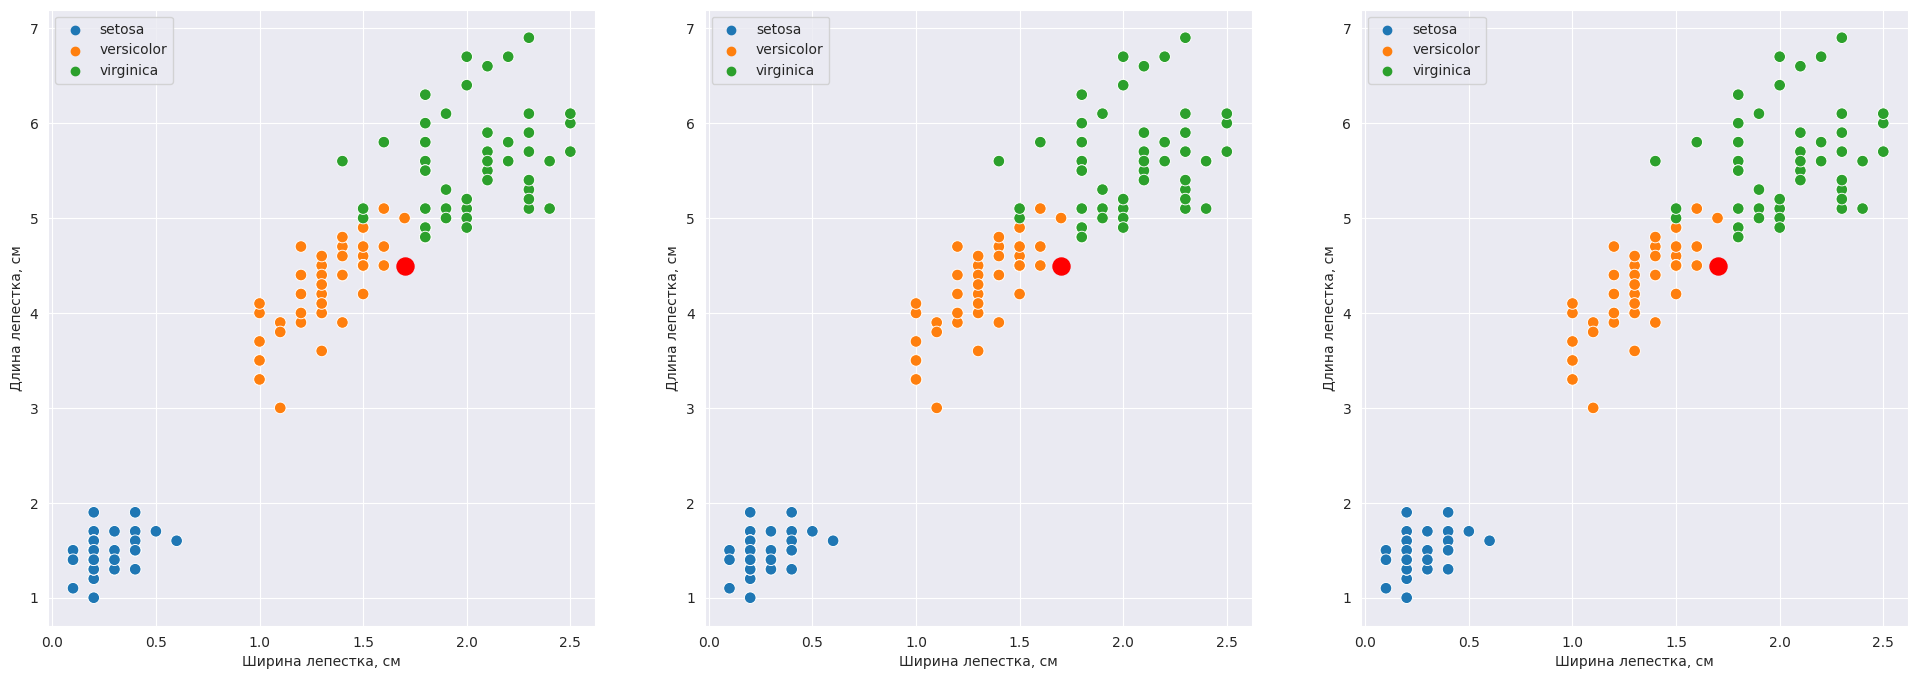

In [21]:
plt.figure(figsize=(24, 8))

plt.subplot(131)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.ylabel('Длина лепестка, см')
plt.xlabel('Ширина лепестка, см')
plt.legend()
plt.grid(True)

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred1[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print(f'first accuracy: {accuracy_score(y_test, y_pred1) :.3}')

plt.subplot(132)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.ylabel('Длина лепестка, см')
plt.xlabel('Ширина лепестка, см')
plt.legend()
plt.grid(True)

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred5[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print(f'second accuracy: {accuracy_score(y_test, y_pred5) :.3}')

plt.subplot(133)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.ylabel('Длина лепестка, см')
plt.xlabel('Ширина лепестка, см')
plt.legend()
plt.grid(True)

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred10[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print(f'third accuracy: {accuracy_score(y_test, y_pred10) :.3}')

#### Пример 3.2.1
Для решения задачи можно использовать метод replace фрейма данных pandas для преобразования строковых меток в числовые эквиваленты

In [22]:
dataframe = pd.DataFrame({'оценка': ['низкая', 'низкая', 'средняя', 'средняя', 'высокая']})
scale_mapper = {'низкая': 1, 'средняя': 2, 'высокая': 3}
dataframe['оценка'].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

#### Пример 3.2.2
Дан словарь, и требуется его конвертировать в матрицу признаков.
Для решения задачи можно задействовать класс-векторизатор словаря Dictvectorizer:

In [23]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{'красный': 2, 'синий': 3},
             {'красный': 4, 'синий': 3},
             {'красный': 1, 'желтый': 2},
             {'красный': 2, 'желтый': 2}]

dict_vectorizer = DictVectorizer(sparse=False)

features = dict_vectorizer.fit_transform(data_dict)
features

array([[0., 2., 3.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

#### Задание 3.2.2
Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

In [24]:
data_dict = [{'цвет глаз': 1, 'рост': 152},
             {'вес': 65, 'возраст': 27},
             {'цвет глаз': 2, 'рост': 164, 'возраст': 35},
             {'вес': 55, 'цвет глаз': 2}]

dict_vectorizer = DictVectorizer(sparse=False)

features = dict_vectorizer.fit_transform(data_dict)
features

array([[  0.,   0., 152.,   1.],
       [ 65.,  27.,   0.,   0.],
       [  0.,  35., 164.,   2.],
       [ 55.,   0.,   0.,   2.]])